# WEB SCRAPING AND API
## Jupyter notebook prepared by Thatayotlhe Dinona

#### Data for this project was obtained via the website https://www.ebooks.com/ and was used for learning and personal purpose only. fair usage

In [286]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime

In [290]:
headers = {
    'sec-ch-ua-platform': '"Windows"',
    'Referer': 'https://www.ebooks.com/en-us/category/religion/5479/',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/132.0.0.0 Safari/537.36 Edg/132.0.0.0',
    'sec-ch-ua': '"Not A(Brand";v="8", "Chromium";v="132", "Microsoft Edge";v="132"',
    'Content-Type': 'application/json',
    'sec-ch-ua-mobile': '?0',
}

params = {
    'CountryCode': 'US',
    'bisacId': '5479',
}

response = requests.get('https://www.ebooks.com/api/search/bisac/', params=params, headers=headers)

In [116]:
response.status_code

200

In [120]:
type(response.json())

dict

In [122]:
response.json().keys()

dict_keys(['search_term', 'start_record', 'total_results', 'books', 'pages', 'previous_page', 'next_page'])

In [124]:
len(response.json()['books'])

10

In [126]:
results= response.json()['books']

In [128]:
df=pd.json_normalize(results)

In [130]:
df.head()

,id,book_url,image_url,image_alt_tag,src_set,image_width,image_height,title,edition,subtitle,...,price,description,is_preorder,is_available,preorder_url,add_to_cart_url,currency_symbol,price_number,on_sale_date,short_publication_date
0,211381019,/en-us/book/211381019/religion-matters/stephen...,https://image.ebooks.com/cover/211381019.jpg?w...,Religion Matters,https://image.ebooks.com/cover/211381019.jpg?...,97,150,Religion Matters,(2nd ed.),,...,US$41.44,Cultivating religious literacy through diverse...,False,True,/account/preorder/?bookId=211381019,/cart/add/211381019/,US$,41.435226,2024-07-15T00:00:00,July 2024
1,1719044,/en-us/book/1719044/preparing-for-marriage/den...,https://image.ebooks.com/cover/1719044.jpg?wid...,Preparing for Marriage,https://image.ebooks.com/cover/1719044.jpg?wi...,97,150,Preparing for Marriage,,,...,US$14.99,This dynamic program is designed to help coupl...,False,True,/account/preorder/?bookId=1719044,/cart/add/1719044/,US$,14.990000,2010-12-09T00:00:00,December 2010
2,210746684,/en-us/book/210746684/practicing-the-way/john-...,https://image.ebooks.com/cover/210746684.jpg?w...,Practicing the Way: Be with Jesus. Become like...,https://image.ebooks.com/cover/210746684.jpg?...,97,150,Practicing the Way,,Be with Jesus. Become like him. Do as he did.,...,US$1.99,NEW YORK TIMES BESTSELLER &bull; The author of...,False,True,/account/preorder/?bookId=210746684,/cart/add/210746684/,US$,1.990000,2024-01-16T00:00:00,January 2024
3,210517900,/en-us/book/210517900/the-practice-of-not-thin...,https://image.ebooks.com/cover/210517900.jpg?w...,The Practice of Not Thinking: A Guide to Mindf...,https://image.ebooks.com/cover/210517900.jpg?...,97,150,The Practice of Not Thinking,,A Guide to Mindful Living,...,US$13.99,THE INTERNATIONAL BESTSELLER'Practical and lif...,False,True,/account/preorder/?bookId=210517900,/cart/add/210517900/,US$,13.990000,2021-06-10T00:00:00,June 2021
4,210912418,/en-us/book/210912418/god-tells-the-man-who-ca...,https://image.ebooks.com/cover/210912418.jpg?w...,God Tells the Man Who Cares: God Speaks to Tho...,https://image.ebooks.com/cover/210912418.jpg?...,97,150,God Tells the Man Who Cares,,God Speaks to Those Who Take Time to Listen,...,US$6.99,"""God has nothing to say to the frivolous man.""...",False,True,/account/preorder/?bookId=210912418,/cart/add/210912418/,US$,6.990000,2006-11-30T00:00:00,November 2006


In [132]:
df.columns

Index(['id', 'book_url', 'image_url', 'image_alt_tag', 'src_set',
       'image_width', 'image_height', 'title', 'edition', 'subtitle',
       'authors', 'num_authors', 'series', 'series_number', 'has_series',
       'series_url', 'publisher', 'publication_year', 'price', 'description',
       'is_preorder', 'is_available', 'preorder_url', 'add_to_cart_url',
       'currency_symbol', 'price_number', 'on_sale_date',
       'short_publication_date'],
      dtype='object')

In [134]:
df = df[['title', 'subtitle', 'authors', 'num_authors', 'publisher', 'publication_year', 'price', 'short_publication_date']]


In [136]:
df.head(3)

,title,subtitle,authors,num_authors,publisher,publication_year,price,short_publication_date
0,Religion Matters,,"[{'name': 'Stephen Prothero', 'normalised_name...",1,W. W. Norton & Company,2024,US$41.44,July 2024
1,Preparing for Marriage,,"[{'name': 'Dennis Rainey', 'normalised_name': ...",1,Baker Publishing Group,2010,US$14.99,December 2010
2,Practicing the Way,Be with Jesus. Become like him. Do as he did.,"[{'name': 'John Mark Comer', 'normalised_name'...",1,PRH Christian Publishing,2024,US$1.99,January 2024


In [138]:
df.to_csv('books.csv',index=False)

In [140]:
def load_data(filepath):
    import os
    _, file_ext = os.path.splitext(filepath)
    
    if file_ext == '.csv':
        return pd.read_csv(filepath)
    elif file_ext == '.json':
        return pd.read_json(filepath)
    elif file_ext == '.xlsx':
        return pd.read_excel(filepath)
    else:
        raise ValueError("Unsupported file format")

In [142]:
df = load_data('books.csv')

In [143]:
df.infer_objects()

,title,subtitle,authors,num_authors,publisher,publication_year,price,short_publication_date
0,Religion Matters,NaN,"[{'name': 'Stephen Prothero', 'normalised_name...",1,W. W. Norton & Company,2024,US$41.44,July 2024
1,Preparing for Marriage,NaN,"[{'name': 'Dennis Rainey', 'normalised_name': ...",1,Baker Publishing Group,2010,US$14.99,December 2010
2,Practicing the Way,Be with Jesus. Become like him. Do as he did.,"[{'name': 'John Mark Comer', 'normalised_name'...",1,PRH Christian Publishing,2024,US$1.99,January 2024
3,The Practice of Not Thinking,A Guide to Mindful Living,"[{'name': 'Ryunosuke Koike', 'normalised_name'...",1,Penguin Books Ltd,2021,US$13.99,June 2021
4,God Tells the Man Who Cares,God Speaks to Those Who Take Time to Listen,"[{'name': 'A. W. Tozer', 'normalised_name': 'T...",2,Moody Publishers,2006,US$6.99,November 2006
5,Basic Theology,A Popular Systematic Guide to Understanding Bi...,"[{'name': 'Charles C. Ryrie', 'normalised_name...",1,Moody Publishers,1999,US$1.99,January 1999
6,This Here Flesh,"Spirituality, Liberation, and the Stories That...","[{'name': 'Cole Arthur Riley', 'normalised_nam...",1,Harmony/Rodale/Convergent,2022,US$1.99,February 2022
7,Enough Is Enough,A Step-by-Step Plan to Leave an Abusive Relati...,"[{'name': 'Clarke, PhD, David E', 'normalised_...",3,Moody Publishers,2022,US$2.99,January 2022
8,Confessions,NaN,"[{'name': 'Augustine', 'normalised_name': 'Aug...",2,Random House Publishing Group,2017,US$11.99,June 2017
9,Bloody Zion,Refuting the Jewish Fables That Sustain Israel...,"[{'name': 'Edward Hendrie', 'normalised_name':...",1,Great Mountain Publishing,2023,US$3.99,March 2023


In [146]:
df['authors'] = df['authors'].str.strip('123[{')
df['price'] = df['price'].str.replace('US$','')


In [148]:
df[['Useless column','First_Authors','Second_authors']] = df['authors'].str.split(':',n=2,expand=True)

In [150]:
df.drop(columns=['Useless column'],inplace=True)
df.drop(columns=['authors'],inplace=True)
df.drop(columns=['Second_authors'],inplace=True)

In [152]:
df['First_Authors']= df['First_Authors'].str.strip().str.replace("'"," ")

In [154]:
df[['Normalised','authors']] = df['First_Authors'].str.split(',',n=1,expand=True)

In [156]:
df.drop(columns=['First_Authors'],inplace=True)

In [158]:
df.drop(columns=['Normalised'],inplace=True)

In [160]:
df.head()

,title,subtitle,num_authors,publisher,publication_year,price,short_publication_date,authors
0,Religion Matters,NaN,1,W. W. Norton & Company,2024,41.44,July 2024,normalised_name
1,Preparing for Marriage,NaN,1,Baker Publishing Group,2010,14.99,December 2010,normalised_name
2,Practicing the Way,Be with Jesus. Become like him. Do as he did.,1,PRH Christian Publishing,2024,1.99,January 2024,normalised_name
3,The Practice of Not Thinking,A Guide to Mindful Living,1,Penguin Books Ltd,2021,13.99,June 2021,normalised_name
4,God Tells the Man Who Cares,God Speaks to Those Who Take Time to Listen,2,Moody Publishers,2006,6.99,November 2006,normalised_name


In [164]:
df['price'] = df['price'].astype(float)
df['publication_year'] = pd.to_datetime(df['publication_year'])

In [166]:
price_by_book=df.groupby('title')['price'].mean().sort_values()

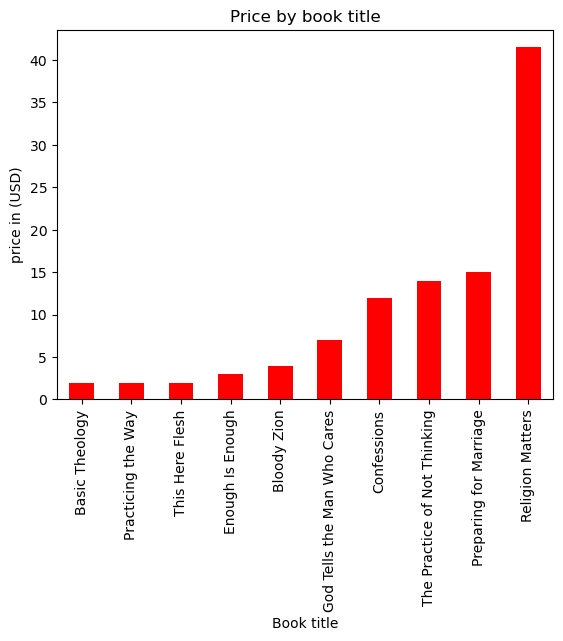

In [216]:
price_by_book.plot(kind='bar',color='red')
plt.xticks(rotation=90)
plt.ylabel('price in (USD)')
plt.xlabel('Book title')
plt.title('Price by book title')
plt.show()

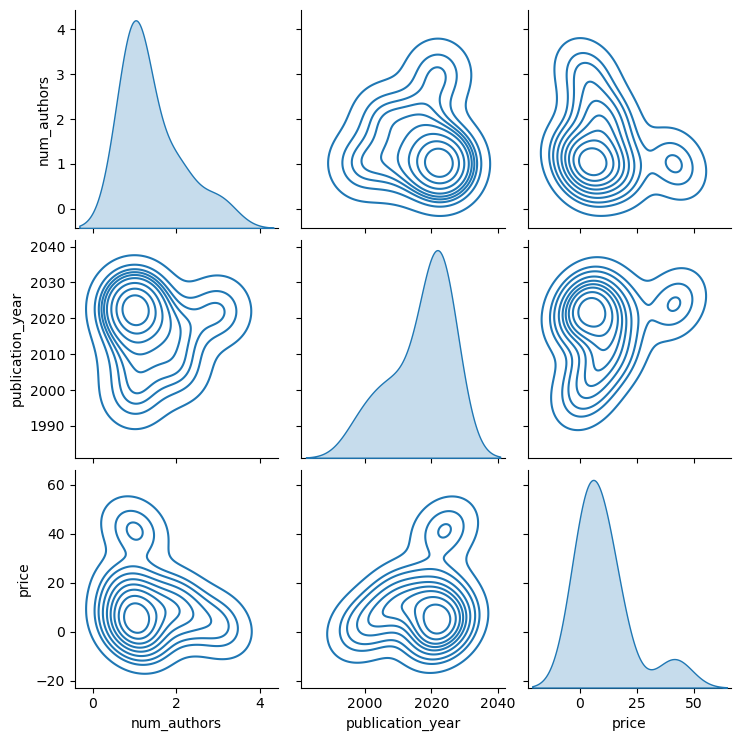

In [284]:
sns.pairplot(df,kind='kde')
plt.show()

In [170]:
publishers=df.groupby('publisher')['price'].mean().sort_values()

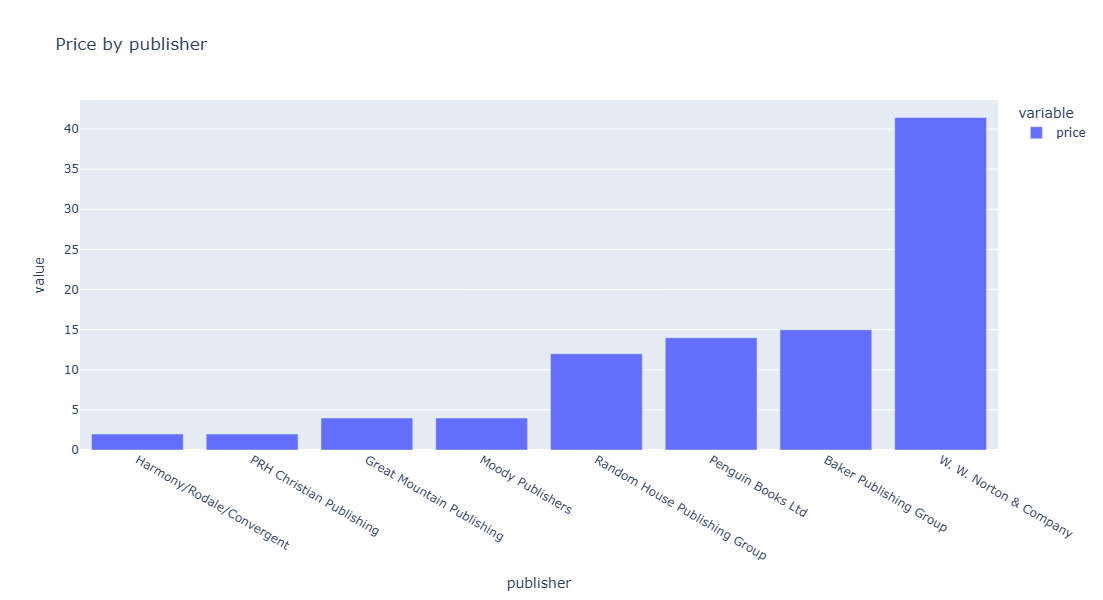

In [310]:
fig=px.bar(publishers,title='Price by publisher')
fig.update_layout(width=800,height=600)
fig.show()

In [172]:
num_authors=df.groupby('title')['num_authors'].mean().sort_values()

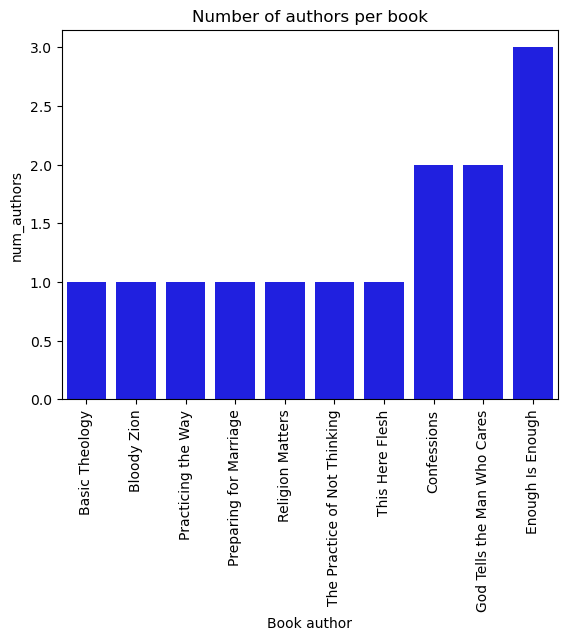

In [214]:
sns.barplot(num_authors,color='blue')
plt.title('Number of authors per book')
plt.xlabel('Book author')
plt.xticks(rotation=90)
plt.show()

In [204]:
grouped=df.groupby('publication_year')['price'].mean()

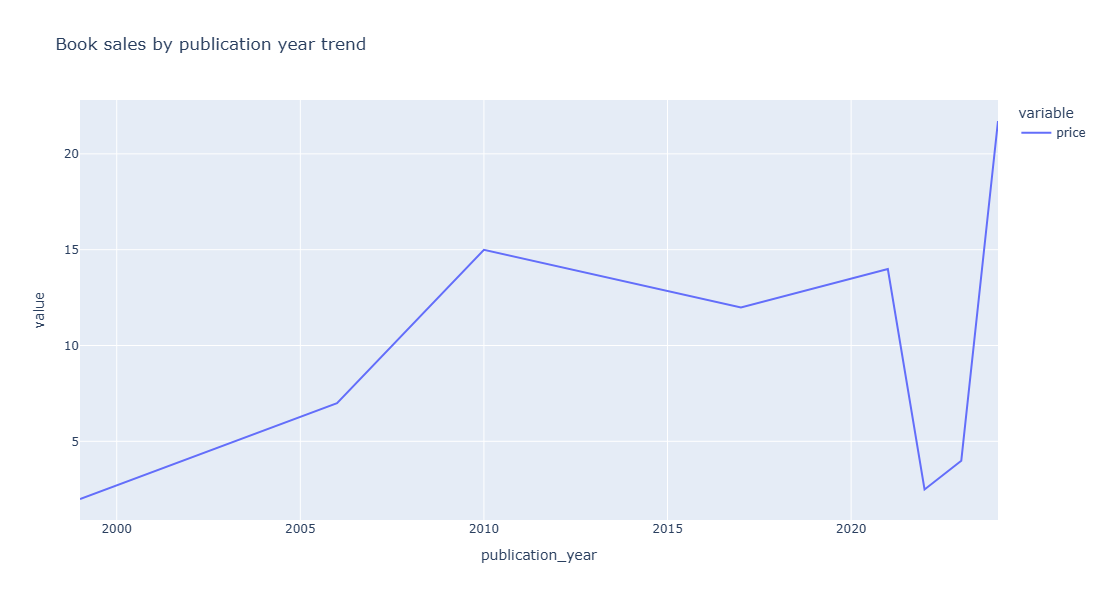

In [304]:
fig=px.line(grouped,title='Book sales by publication year trend')
fig.update_layout(width=800,height=600)
fig.show()

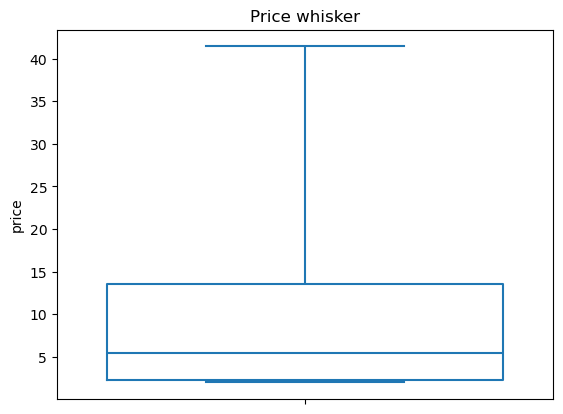

In [278]:
sns.boxplot(df['price'],whis=(0,100),fill=False,linewidth=1.5)
plt.title('Price whisker')
plt.show()